In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import torch
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
import torchvision
import torch.nn as nn

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive"

In [ ]:
!cd /content/drive/MyDrive/

In [ ]:
!kaggle datasets download -d valentynsichkar/traffic-signs-preprocessed

100% 4.16G/4.16G [03:42<00:00, 23.2MB/s]
100% 4.16G/4.16G [03:42<00:00, 20.1MB/s]


In [ ]:
!mkdir data

In [ ]:
!unzip traffic-signs-preprocessed.zip -d data

Archive:  traffic-signs-preprocessed.zip
  inflating: data/data0.pickle       
  inflating: data/data1.pickle       
  inflating: data/data2.pickle       
  inflating: data/data3.pickle       
  inflating: data/data4.pickle       
  inflating: data/data5.pickle       
  inflating: data/data6.pickle       
  inflating: data/data7.pickle       
  inflating: data/data8.pickle       
  inflating: data/datasets_preparing.py  
  inflating: data/label_names.csv    
  inflating: data/labels.pickle      
  inflating: data/mean_image_gray.pickle  
  inflating: data/mean_image_rgb.pickle  
  inflating: data/std_gray.pickle    
  inflating: data/std_rgb.pickle     
  inflating: data/test.pickle        
  inflating: data/train.pickle       
  inflating: data/valid.pickle       


In [ ]:
training = pd.read_pickle('/content/data/train.pickle')

In [ ]:
type(training)

dict

In [ ]:
training.keys()

dict_keys(['coords', 'labels', 'features', 'sizes'])

In [ ]:
np.unique(training['labels'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=uint8)

In [ ]:
training['features'].shape

(34799, 32, 32, 3)

In [ ]:
type(training['features'])

numpy.ndarray

In [ ]:
len(training['features'])

34799

In [ ]:
first_of_train = training['features'][0]
first_of_train

array([[[28, 25, 24],
        [27, 24, 23],
        [27, 24, 22],
        ...,
        [32, 28, 24],
        [31, 27, 25],
        [31, 27, 26]],

       [[29, 26, 25],
        [27, 25, 23],
        [27, 25, 23],
        ...,
        [32, 28, 24],
        [31, 27, 24],
        [30, 27, 25]],

       [[28, 26, 26],
        [27, 25, 23],
        [26, 25, 23],
        ...,
        [32, 28, 24],
        [31, 27, 24],
        [30, 27, 25]],

       ...,

       [[27, 24, 23],
        [28, 25, 24],
        [30, 25, 24],
        ...,
        [27, 24, 23],
        [28, 24, 22],
        [29, 25, 22]],

       [[28, 23, 23],
        [29, 24, 24],
        [31, 25, 24],
        ...,
        [27, 24, 23],
        [28, 24, 22],
        [28, 24, 21]],

       [[29, 23, 23],
        [30, 24, 24],
        [32, 24, 23],
        ...,
        [27, 24, 22],
        [27, 23, 21],
        [26, 22, 20]]], dtype=uint8)

In [ ]:
training['labels']

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

In [ ]:
first_of_train.shape

(32, 32, 3)

In [ ]:
type(first_of_train)

numpy.ndarray

In [ ]:
train_features = training['features']

In [ ]:
gray_train_ndarr = np.dot(train_features[...,:3], [0.299, 0.587, 0.114]).astype(np.float32)

In [ ]:
gray_train_ndarr.shape

(34799, 32, 32)

In [ ]:
gray_train_ndarr[0]

array([[25.783, 24.783, 24.669, ..., 28.74 , 27.968, 28.082],
       [26.783, 25.37 , 25.37 , ..., 28.74 , 27.854, 27.669],
       [26.598, 25.37 , 25.071, ..., 28.74 , 27.854, 27.669],
       ...,
       [24.783, 25.783, 26.381, ..., 24.783, 24.968, 25.854],
       [24.495, 25.495, 26.68 , ..., 24.783, 24.968, 24.854],
       [24.794, 25.794, 26.278, ..., 24.669, 23.968, 22.968]],
      dtype=float32)

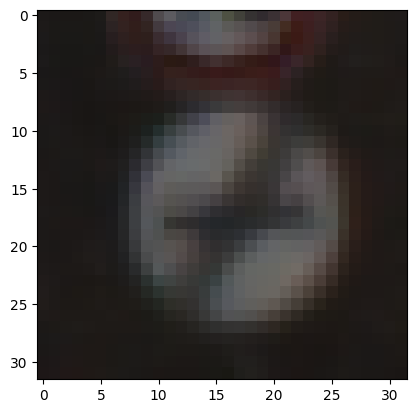

In [ ]:
plt.imshow(first_of_train)
plt.show()

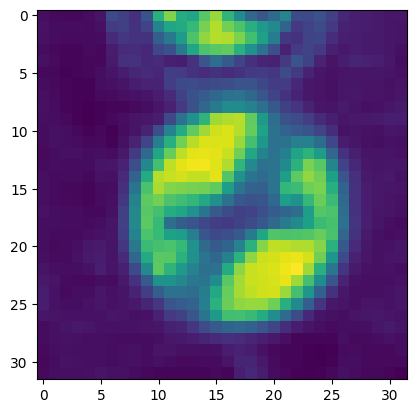

In [ ]:
plt.imshow(gray_train_ndarr[0])
plt.show()

In [ ]:
training['labels'][0]

41

In [ ]:
training['labels'].shape

(34799,)

In [ ]:
test = pd.read_pickle('/content/data/test.pickle')

In [ ]:
test.keys()

dict_keys(['sizes', 'coords', 'features', 'labels'])

In [ ]:
test['features'].shape

(12630, 32, 32, 3)

In [ ]:
gray_test_ndarr = np.dot(test['features'][...,:3], [0.299, 0.587, 0.114]).astype(np.float32)
gray_test_ndarr.shape

(12630, 32, 32)

In [ ]:
validation = pd.read_pickle('/content/data/valid.pickle')

In [ ]:
validation['features'].shape

(4410, 32, 32, 3)

In [ ]:
gray_valid_ndarr = np.dot(validation['features'][...,:3], [0.299, 0.587, 0.114]).astype(np.float32)
gray_valid_ndarr.shape

(4410, 32, 32)

In [ ]:
labels_df = pd.read_csv('/content/data/label_names.csv')
labels_df.head()

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


In [ ]:
labels_df.tail()

,ClassId,SignName
38,38,Keep right
39,39,Keep left
40,40,Roundabout mandatory
41,41,End of no passing
42,42,End of no passing by vehicles over 3.5 metric ...


In [ ]:
labels = list(labels_df['SignName'])
labels

['Speed limit (20km/h)',
 'Speed limit (30km/h)',
 'Speed limit (50km/h)',
 'Speed limit (60km/h)',
 'Speed limit (70km/h)',
 'Speed limit (80km/h)',
 'End of speed limit (80km/h)',
 'Speed limit (100km/h)',
 'Speed limit (120km/h)',
 'No passing',
 'No passing for vehicles over 3.5 metric tons',
 'Right-of-way at the next intersection',
 'Priority road',
 'Yield',
 'Stop',
 'No vehicles',
 'Vehicles over 3.5 metric tons prohibited',
 'No entry',
 'General caution',
 'Dangerous curve to the left',
 'Dangerous curve to the right',
 'Double curve',
 'Bumpy road',
 'Slippery road',
 'Road narrows on the right',
 'Road work',
 'Traffic signals',
 'Pedestrians',
 'Children crossing',
 'Bicycles crossing',
 'Beware of ice/snow',
 'Wild animals crossing',
 'End of all speed and passing limits',
 'Turn right ahead',
 'Turn left ahead',
 'Ahead only',
 'Go straight or right',
 'Go straight or left',
 'Keep right',
 'Keep left',
 'Roundabout mandatory',
 'End of no passing',
 'End of no passing 

In [ ]:
# Dataset class

from torch.utils.data import Dataset

class TrafficSignsDataset(Dataset):
    def __init__(self, data, transform=None):
        self.features = data['features']
        self.labels = data['labels']
        self.transform = transform

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        image = self.features[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label


In [ ]:
transform = transforms.Compose([
    transforms.ToTensor()
])

train_dataset = TrafficSignsDataset(training, transform=transform)
valid_dataset = TrafficSignsDataset(validation, transform=transform)
test_dataset = TrafficSignsDataset(test, transform=transform)

In [ ]:
len(train_dataset)

34799

In [ ]:
NUM_WORKERS = os.cpu_count()

In [ ]:
#Loading the data

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=NUM_WORKERS, pin_memory=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=32, shuffle=True, num_workers=NUM_WORKERS, pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=NUM_WORKERS, pin_memory=True)

In [ ]:
# Some evaluation functions

from typing import List, Tuple

def plot_loss_curves(results, title):
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    epochs = range(len(results["train_loss"]))

    plt.figure(figsize=(12, 4))
    plt.suptitle(title, fontsize=15)

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_accuracy")
    plt.plot(epochs, test_accuracy, label="test_accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

def calculate_performance(
        model: torch.nn.Module,
        dataloader: torch.utils.data.DataLoader,
        device: torch.device,
        class_names: List[str],
        title: str) -> Tuple[float, float, float]:
    model.eval()

    y_pred = []
    y_true = []
    test_acc = 0
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            test_pred_logits = model(X)

            output = (torch.max(torch.exp(test_pred_logits), 1)[1]).data.cpu().numpy()
            y_pred.extend(output)

            labels = y.data.cpu().numpy()
            y_true.extend(labels)

            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item() / len(test_pred_labels))

    test_acc = test_acc / len(dataloader)

    cf_matrix = confusion_matrix(y_true, y_pred, normalize='true')
    f1 = f1_score(y_true, y_pred, average='macro')
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')

    df_cm = pd.DataFrame(cf_matrix, index=[i for i in class_names],
                         columns=[i for i in class_names])
    plt.figure(figsize=(40, 30))
    plt.title(title)
    sns.heatmap(df_cm, annot=True)
    plt.show()

    return test_acc, f1, precision, recall

In [ ]:
# Implementing a simple CNN

from torch import nn

class SimpleCNN(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape),
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.classifier(x)
        return x


In [ ]:
# A function in order to use for training

from tqdm.auto import tqdm
from typing import Dict

def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device) -> Tuple[float, float]:
    model.train()

    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y_pred = model(X)

        loss = loss_fn(y_pred, y)
        train_loss += loss.item()
        

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item() / len(y_pred)

    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc


def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device) -> Tuple[float, float]:
    model.eval()

    test_loss, test_acc = 0, 0
    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            test_pred_logits = model(X)

            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item() / len(test_pred_labels))

    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc


def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int,
          device: torch.device) -> Dict[str, List]:
    results = {"train_loss": [],
               "train_acc": [],
               "test_loss": [],
               "test_acc": []
               }
    model.to(device)

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)

        print(
            f"Epoch: {epoch + 1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = SimpleCNN(input_shape=3, hidden_units=10, output_shape=43)
model_1.to(device)

SimpleCNN(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=43, bias=True)
  )
)

In [ ]:
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01, momentum = 0.9)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
results_simple_cnn = train(
    model_1,
    train_dataloader,
    valid_dataloader,
    optimizer, 
    loss_fn,
    epochs=10,
    device=device)


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1177 | train_acc: 0.6905 | test_loss: 0.5785 | test_acc: 0.8421
Epoch: 2 | train_loss: 0.1694 | train_acc: 0.9537 | test_loss: 0.5302 | test_acc: 0.8835
Epoch: 3 | train_loss: 0.0910 | train_acc: 0.9744 | test_loss: 0.6194 | test_acc: 0.8638
Epoch: 4 | train_loss: 0.0543 | train_acc: 0.9851 | test_loss: 0.4842 | test_acc: 0.8998
Epoch: 5 | train_loss: 0.0410 | train_acc: 0.9887 | test_loss: 0.4331 | test_acc: 0.9078
Epoch: 6 | train_loss: 0.0323 | train_acc: 0.9913 | test_loss: 0.3815 | test_acc: 0.9172
Epoch: 7 | train_loss: 0.0223 | train_acc: 0.9937 | test_loss: 0.3860 | test_acc: 0.9274
Epoch: 8 | train_loss: 0.0153 | train_acc: 0.9956 | test_loss: 0.4398 | test_acc: 0.9110
Epoch: 9 | train_loss: 0.0117 | train_acc: 0.9970 | test_loss: 0.4833 | test_acc: 0.9037
Epoch: 10 | train_loss: 0.0116 | train_acc: 0.9966 | test_loss: 0.4161 | test_acc: 0.9187


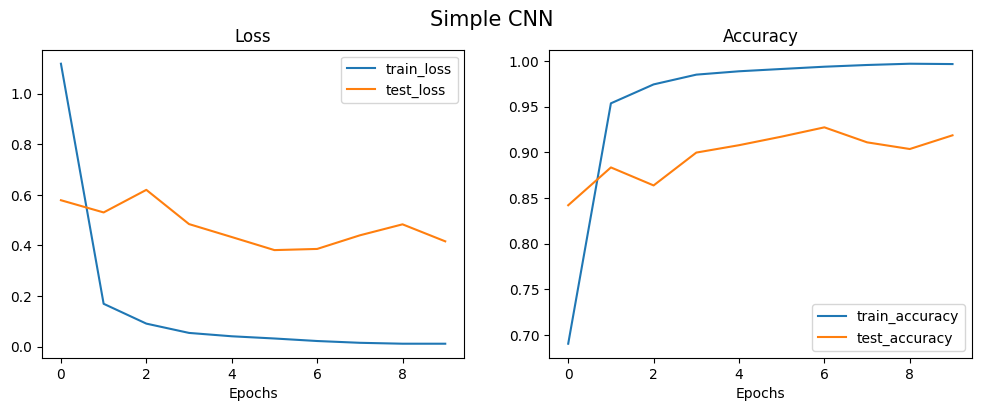

In [ ]:
plot_loss_curves(results_simple_cnn, title="Simple CNN")

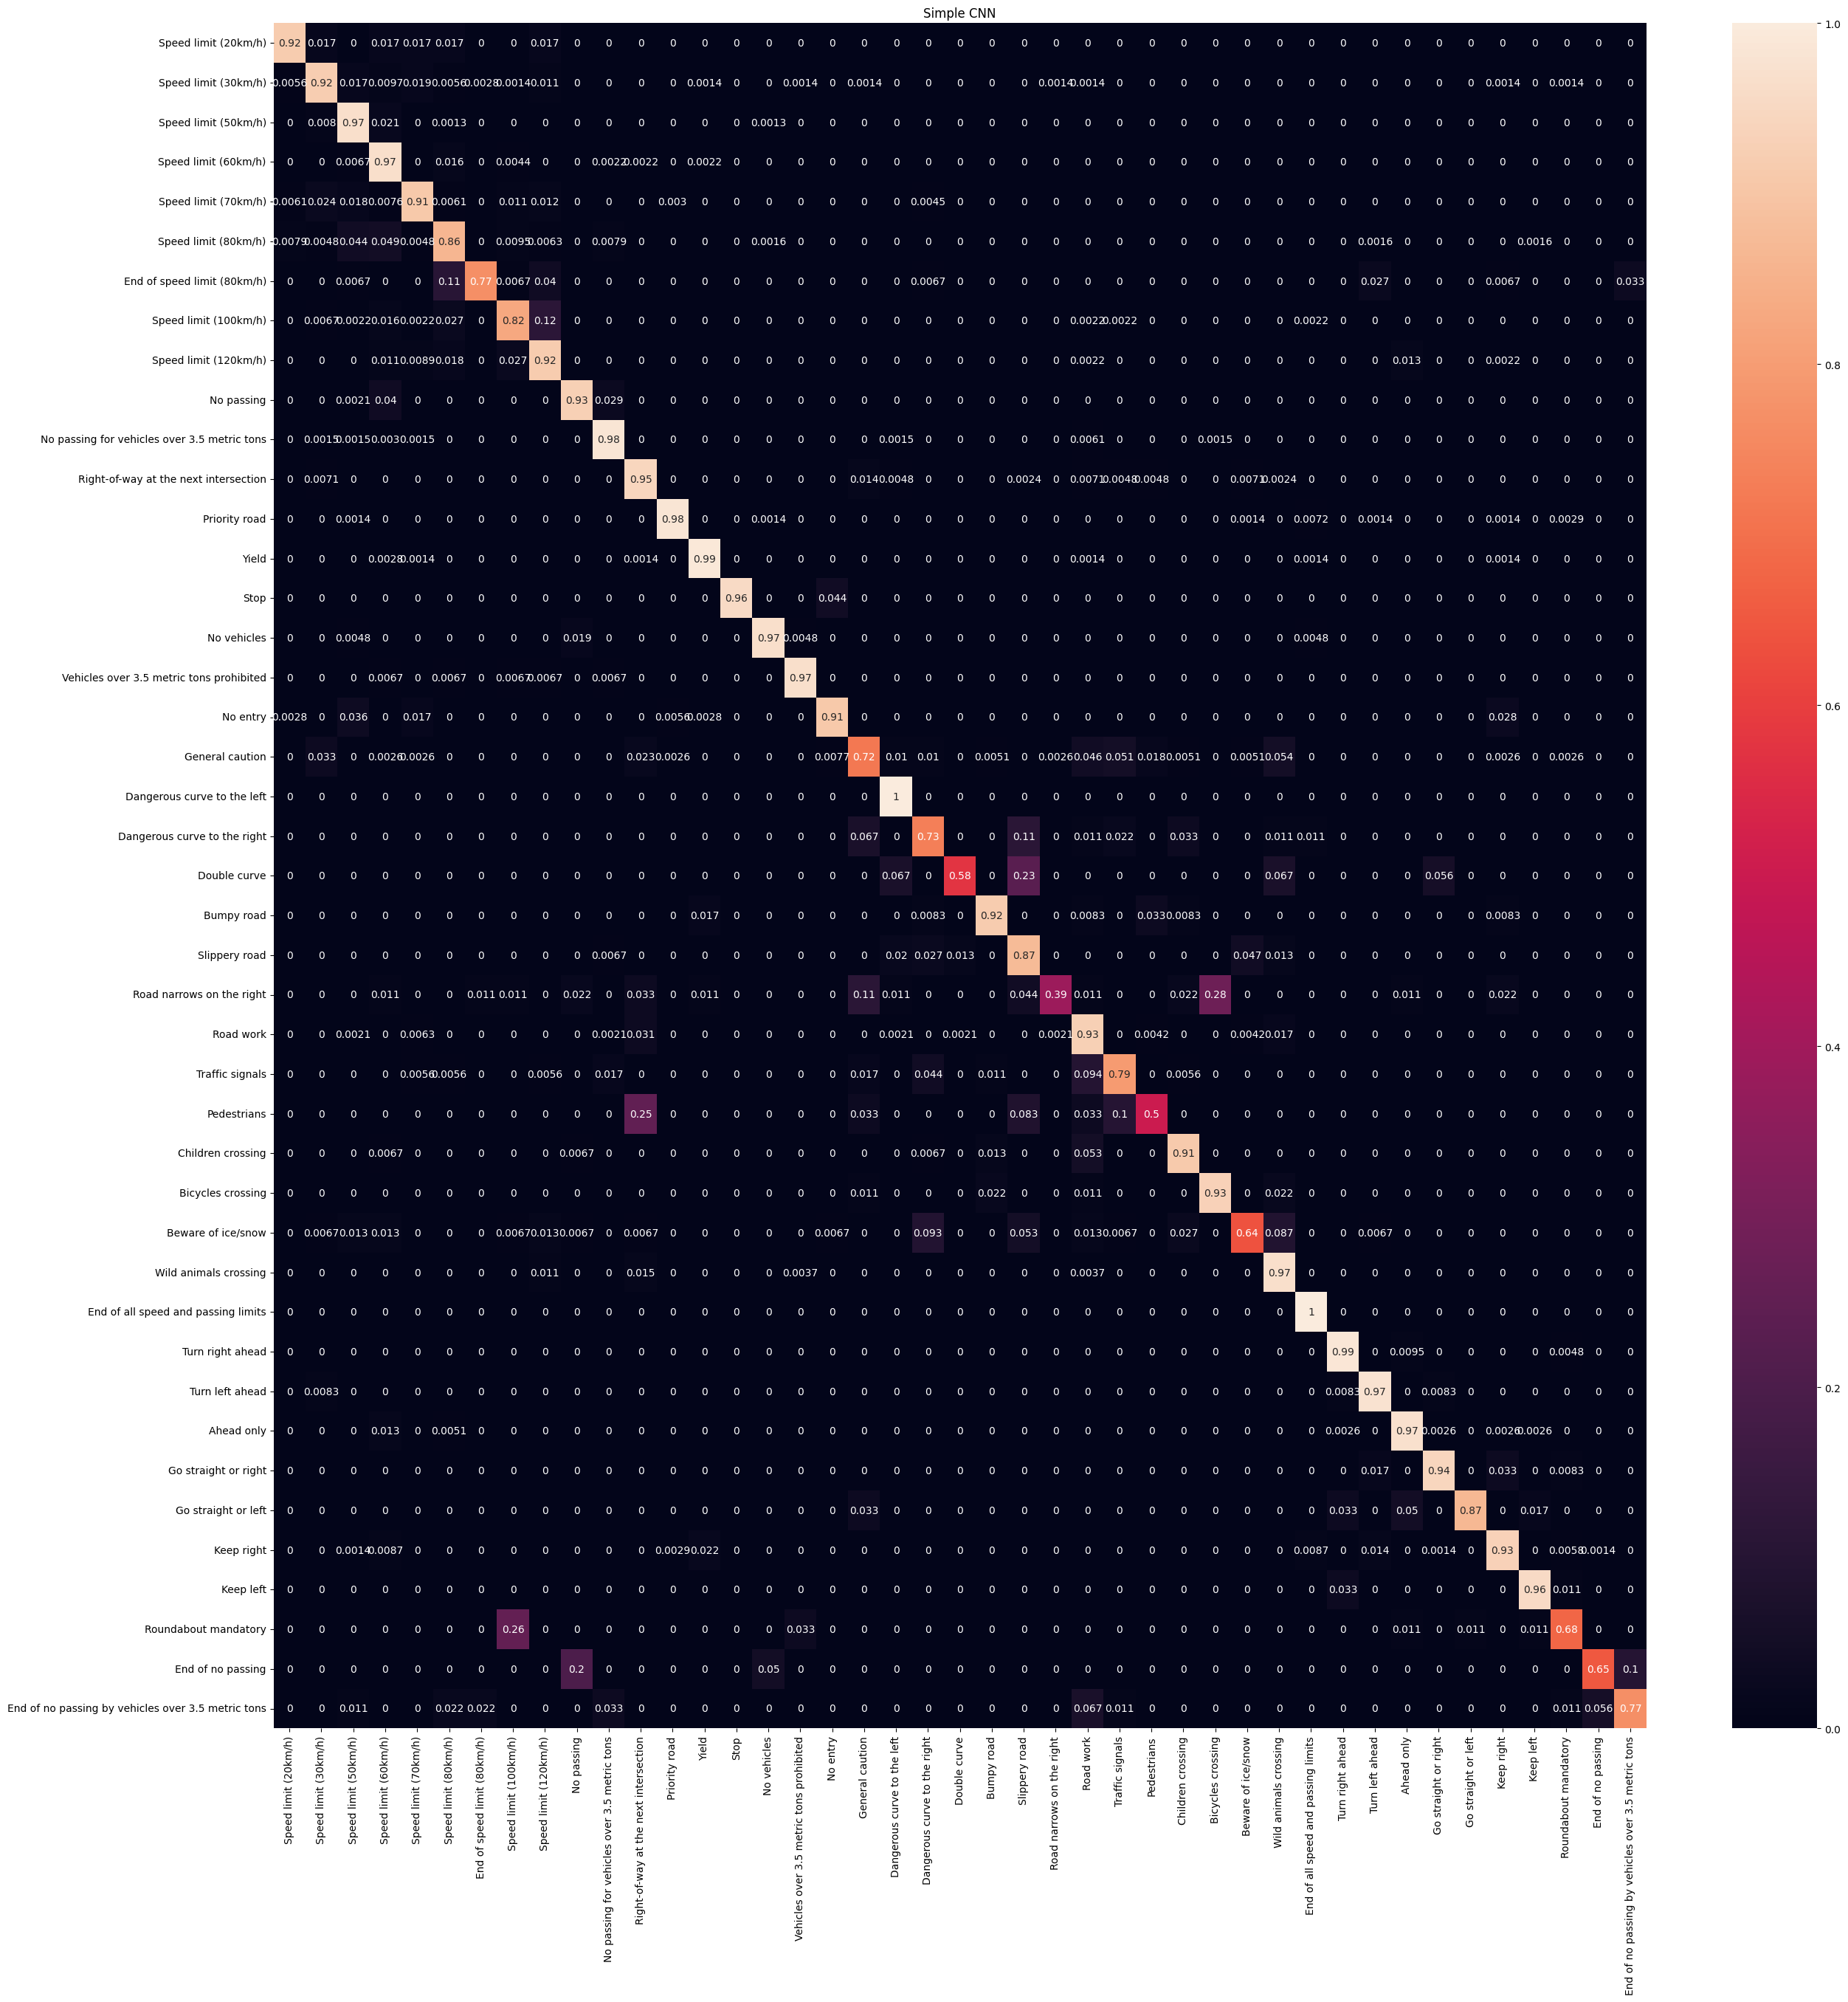

Accuracy = 0.9095512082853855, 
f1 score = 0.8697195777490159, 
precision = 0.8867676483025949, 
recall = 0.8669404497030886


In [ ]:
acc, f1, precision, recall = calculate_performance(model_1, 
                                                  test_dataloader, 
                                                  device, 
                                                  labels, 
                                                  "Simple CNN")
print(f"Accuracy = {acc}, \nf1 score = {f1}, \nprecision = {precision}, \nrecall = {recall}")


In [ ]:
training = pd.read_pickle('/content/data/train.pickle')
test = pd.read_pickle('/content/data/test.pickle')
validation = pd.read_pickle('/content/data/valid.pickle')

train_dataset = TrafficSignsDataset(training, transform=transform)
valid_dataset = TrafficSignsDataset(validation, transform=transform)
test_dataset = TrafficSignsDataset(test, transform=transform)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=NUM_WORKERS, pin_memory=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=32, shuffle=True, num_workers=NUM_WORKERS, pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=NUM_WORKERS, pin_memory=True)

In [ ]:
class CustomCNN(nn.Module):
    def __init__(self, input_shape: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=32,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.Conv2d(in_channels=32,
                      out_channels=32,
                      kernel_size=3,
                      padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            nn.MaxPool2d(kernel_size=2),
            nn.Dropout(p=0.25)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            nn.MaxPool2d(2),
            nn.Dropout(p=0.25)
        )
        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(128),
            nn.MaxPool2d(2),
            nn.Dropout(p=0.25)
        )
        self.conv_block_4 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.BatchNorm2d(256),
            nn.MaxPool2d(2),
            nn.Dropout(p=0.25)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=256*2*2, out_features=512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=512, out_features=1024),
            nn.ReLU(),
            nn.BatchNorm1d(1024),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=1024, out_features=output_shape),
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.conv_block_3(x)
        x = self.conv_block_4(x)
        x = self.classifier(x)
        return x


In [ ]:
torch.cuda.manual_seed(42)

model_2 = CustomCNN(input_shape=3, output_shape=43)
model_2.to(device)

CustomCNN(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout(p=0.25, inplace=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False

In [ ]:
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.01, momentum = 0.9)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
results_custom_cnn = train(
    model_2,
    train_dataloader,
    valid_dataloader,
    optimizer, 
    loss_fn,
    epochs=10,
    device=device)


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 3.8099 | train_acc: 0.2068 | test_loss: 2.0759 | test_acc: 0.3533
Epoch: 2 | train_loss: 1.6689 | train_acc: 0.4808 | test_loss: 1.0885 | test_acc: 0.6563
Epoch: 3 | train_loss: 0.7786 | train_acc: 0.7515 | test_loss: 0.5856 | test_acc: 0.8432
Epoch: 4 | train_loss: 0.4135 | train_acc: 0.8696 | test_loss: 0.3330 | test_acc: 0.9119
Epoch: 5 | train_loss: 0.1996 | train_acc: 0.9358 | test_loss: 0.2526 | test_acc: 0.9387
Epoch: 6 | train_loss: 0.1286 | train_acc: 0.9604 | test_loss: 0.2392 | test_acc: 0.9493
Epoch: 7 | train_loss: 0.0973 | train_acc: 0.9697 | test_loss: 0.2562 | test_acc: 0.9505
Epoch: 8 | train_loss: 0.0767 | train_acc: 0.9780 | test_loss: 0.1747 | test_acc: 0.9664
Epoch: 9 | train_loss: 0.0523 | train_acc: 0.9839 | test_loss: 0.1693 | test_acc: 0.9730
Epoch: 10 | train_loss: 0.0500 | train_acc: 0.9847 | test_loss: 0.1611 | test_acc: 0.9739


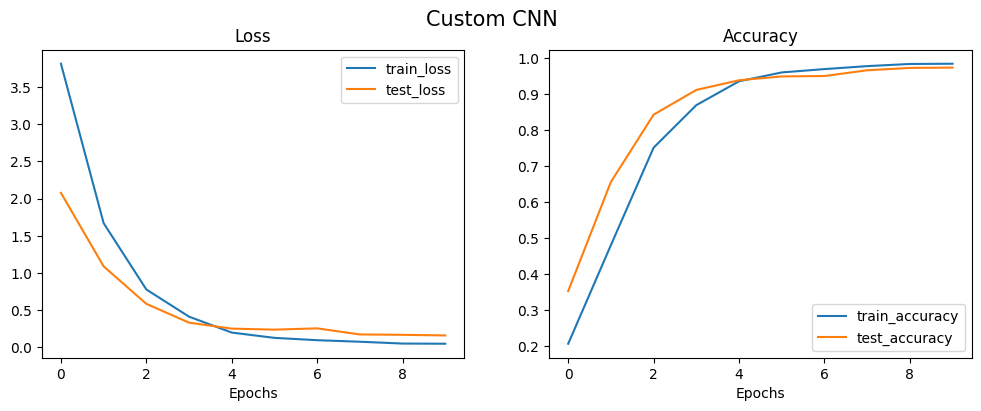

In [ ]:
plot_loss_curves(results_custom_cnn, title="Custom CNN")

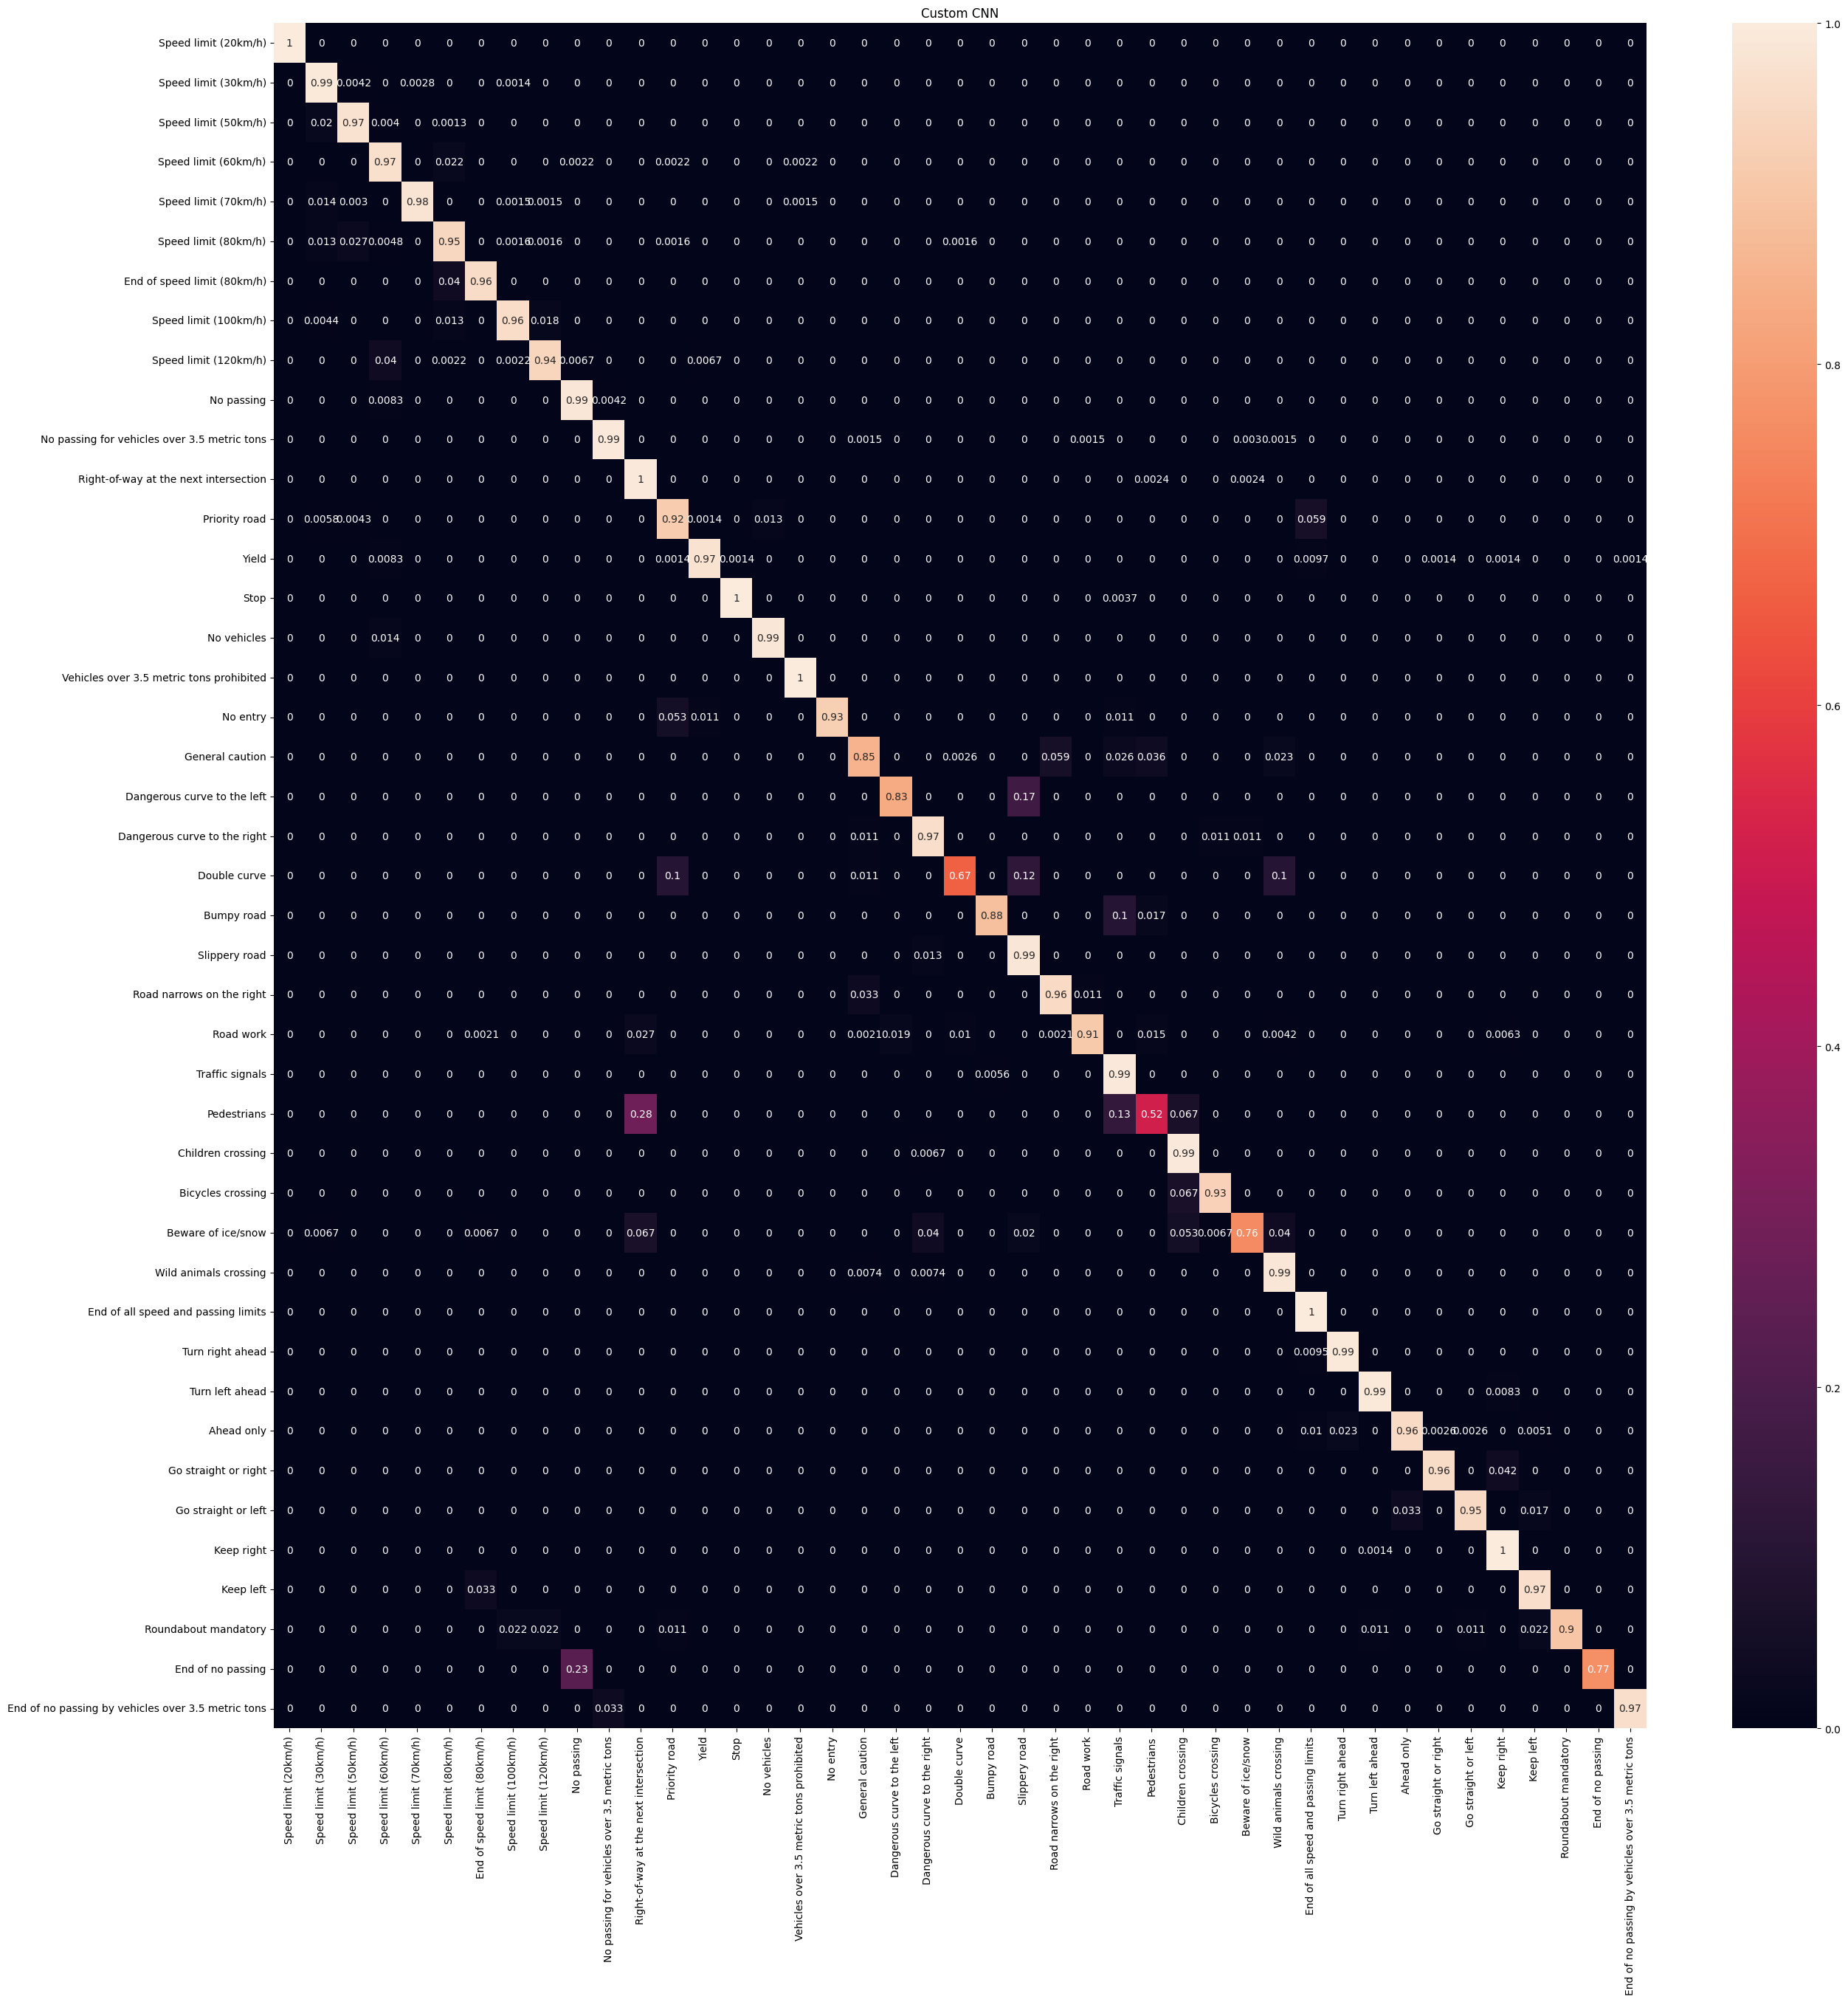

Accuracy = 0.9564945339470656, 
f1 score = 0.9307439748854984, 
precision = 0.9343949276577442, 
recall = 0.9347020650771913


In [ ]:
acc, f1, precision, recall = calculate_performance(model_2, 
                                                  test_dataloader, 
                                                  device, 
                                                  labels, 
                                                  "Custom CNN")
print(f"Accuracy = {acc}, \nf1 score = {f1}, \nprecision = {precision}, \nrecall = {recall}")


**ResNet50**

In [ ]:
ResNet_weights = torchvision.models.ResNet50_Weights.DEFAULT
model_resnet = torchvision.models.resnet50(weights=ResNet_weights).to(device)

# freezing the parameters
for param in model_resnet.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 288MB/s]


In [ ]:
model_resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

output_shape = len(labels)

# fully connected layer
model_resnet.fc = nn.Sequential(
    nn.Linear(in_features=2048, out_features=2048, bias=True),
    nn.ReLU(),
    nn.BatchNorm1d(2048),
    nn.Dropout(p=0.5, inplace=True),
    nn.Linear(2048, 43)
    ).to(device)


torch.autograd.set_detect_anomaly(True)
optimizer = torch.optim.Adam(model_resnet.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()


In [ ]:
manual_transforms = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [ ]:
train_dataset = TrafficSignsDataset(training, transform=manual_transforms)
valid_dataset = TrafficSignsDataset(validation, transform=manual_transforms)
test_dataset = TrafficSignsDataset(test, transform=manual_transforms)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=NUM_WORKERS, pin_memory=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=32, shuffle=True, num_workers=NUM_WORKERS, pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=NUM_WORKERS, pin_memory=True)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

results_resnet = train(model_resnet,
                       train_dataloader,
                       valid_dataloader,
                       optimizer,
                       loss_fn,
                       epochs=10,
                       device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.9427 | train_acc: 0.7105 | test_loss: 1.4167 | test_acc: 0.6335
Epoch: 2 | train_loss: 0.5665 | train_acc: 0.8147 | test_loss: 1.4493 | test_acc: 0.6451
Epoch: 3 | train_loss: 0.4884 | train_acc: 0.8371 | test_loss: 1.9829 | test_acc: 0.5729
Epoch: 4 | train_loss: 0.4309 | train_acc: 0.8571 | test_loss: 1.4276 | test_acc: 0.6666
Epoch: 5 | train_loss: 0.3882 | train_acc: 0.8698 | test_loss: 1.4810 | test_acc: 0.6621
Epoch: 6 | train_loss: 0.3804 | train_acc: 0.8761 | test_loss: 1.5412 | test_acc: 0.6685
Epoch: 7 | train_loss: 0.3448 | train_acc: 0.8829 | test_loss: 1.4841 | test_acc: 0.6732
Epoch: 8 | train_loss: 0.3254 | train_acc: 0.8916 | test_loss: 1.6142 | test_acc: 0.6704
Epoch: 9 | train_loss: 0.3055 | train_acc: 0.8963 | test_loss: 1.5132 | test_acc: 0.6860
Epoch: 10 | train_loss: 0.3042 | train_acc: 0.8996 | test_loss: 1.4865 | test_acc: 0.6816


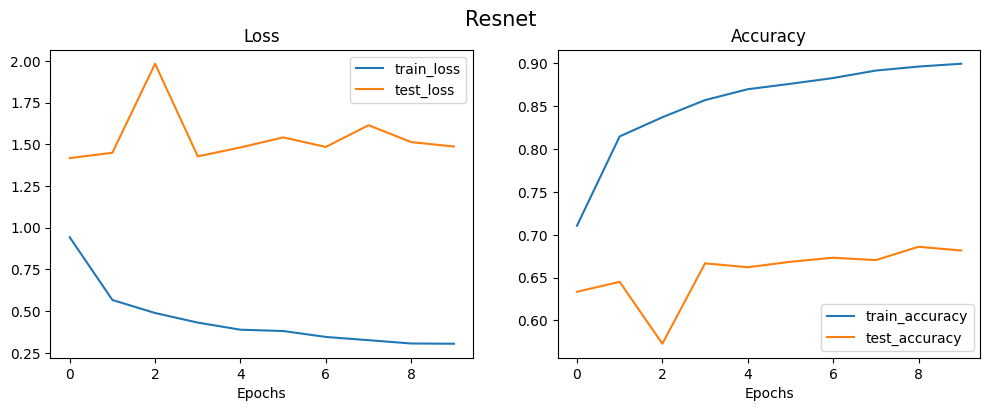

In [ ]:
plot_loss_curves(results_resnet, title="Resnet")

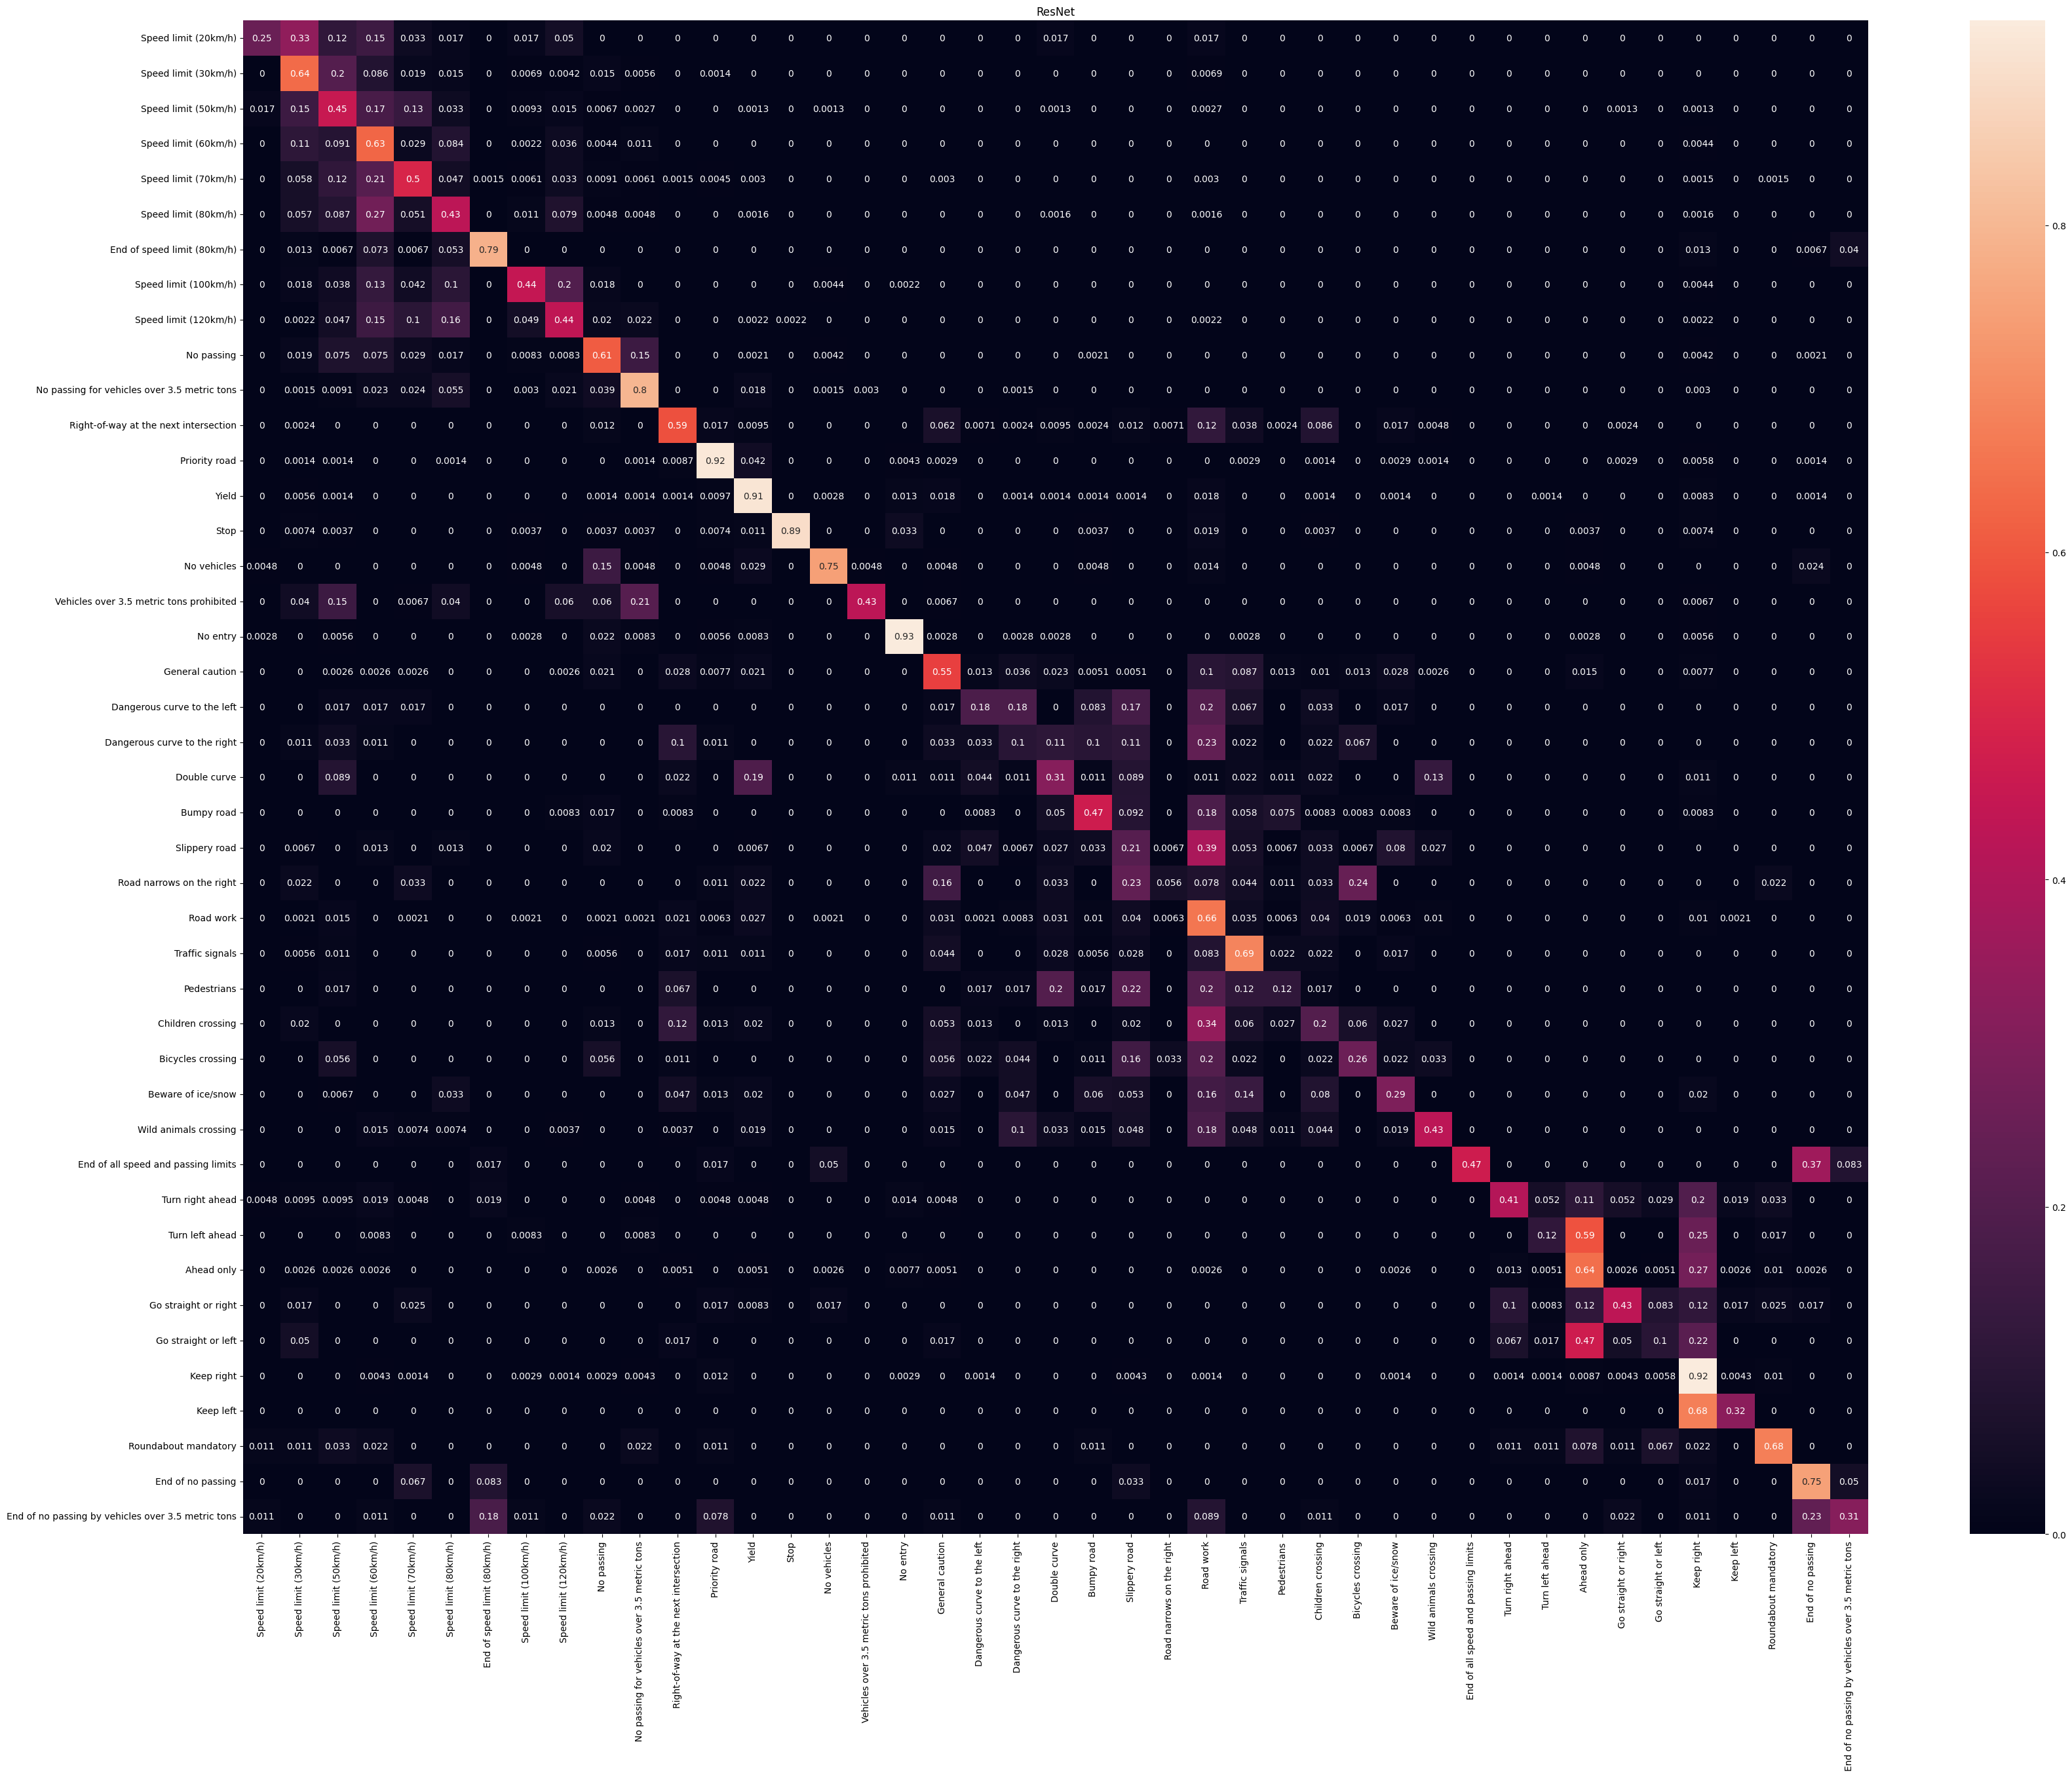

Accuracy = 0.6020569620253164, 
f1 score = 0.5075673610199799, 
precision = 0.5725768945182048, 
recall = 0.48924772305737924


In [ ]:
acc, f1, precision, recall = calculate_performance(model_resnet, 
                                                  test_dataloader, 
                                                  device, 
                                                  labels, 
                                                  "ResNet")
print(f"Accuracy = {acc}, \nf1 score = {f1}, \nprecision = {precision}, \nrecall = {recall}")


**VGG-16**

In [ ]:
# vgg_weights = torchvision.models.VGG16_BN_Weights.DEFAULT
model_vgg = torchvision.models.vgg16_bn(pretrained=True).to(device)

for param in model_vgg.parameters():
    param.requires_grad = False

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 528M/528M [00:05<00:00, 95.3MB/s]


In [ ]:
model_vgg

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

In [ ]:
model_vgg.classifier[-1].in_features

4096

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# fully connected layer
model_vgg.classifier[-1]  = nn.Sequential(
    nn.Linear(in_features=4096, out_features=4096, bias=True),
    nn.BatchNorm1d(4096),
    nn.Dropout(p=0.2, inplace=True),
    nn.Linear(in_features=4096, out_features=4096, bias=True)
    ).to(device)

optimizer = torch.optim.Adam(model_vgg.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
manual_transforms = transforms.Compose([
    transforms.ToTensor(), 
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [ ]:
train_dataset = TrafficSignsDataset(training, transform=manual_transforms)
valid_dataset = TrafficSignsDataset(validation, transform=manual_transforms)
test_dataset = TrafficSignsDataset(test, transform=manual_transforms)

train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=NUM_WORKERS, pin_memory=True)
valid_dataloader = DataLoader(valid_dataset, batch_size=32, shuffle=True, num_workers=NUM_WORKERS, pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=NUM_WORKERS, pin_memory=True)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

results_vgg = train(model_vgg,
                    train_dataloader,
                    valid_dataloader,
                    optimizer,
                    loss_fn,
                    epochs=10,
                    device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.5305 | train_acc: 0.8207 | test_loss: 1.1525 | test_acc: 0.6888
Epoch: 2 | train_loss: 0.5062 | train_acc: 0.8304 | test_loss: 1.1429 | test_acc: 0.7034
Epoch: 3 | train_loss: 0.5016 | train_acc: 0.8334 | test_loss: 1.1904 | test_acc: 0.6922
Epoch: 4 | train_loss: 0.4783 | train_acc: 0.8422 | test_loss: 1.1382 | test_acc: 0.7116
Epoch: 5 | train_loss: 0.4686 | train_acc: 0.8444 | test_loss: 1.1794 | test_acc: 0.7016
Epoch: 6 | train_loss: 0.4621 | train_acc: 0.8472 | test_loss: 1.2126 | test_acc: 0.7088
Epoch: 7 | train_loss: 0.4395 | train_acc: 0.8546 | test_loss: 1.1077 | test_acc: 0.7170
Epoch: 8 | train_loss: 0.4331 | train_acc: 0.8576 | test_loss: 1.2491 | test_acc: 0.7125
Epoch: 9 | train_loss: 0.4198 | train_acc: 0.8608 | test_loss: 1.2044 | test_acc: 0.6969
Epoch: 10 | train_loss: 0.4139 | train_acc: 0.8626 | test_loss: 1.1456 | test_acc: 0.7154


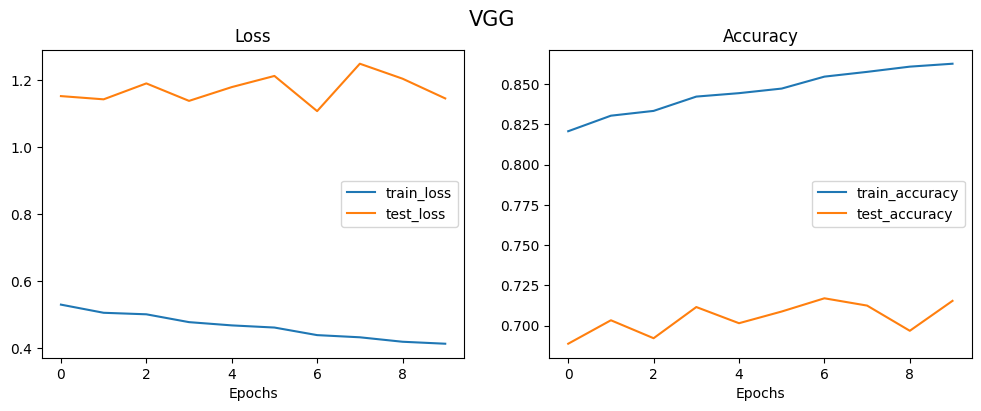

In [ ]:
plot_loss_curves(results_vgg, title="VGG")

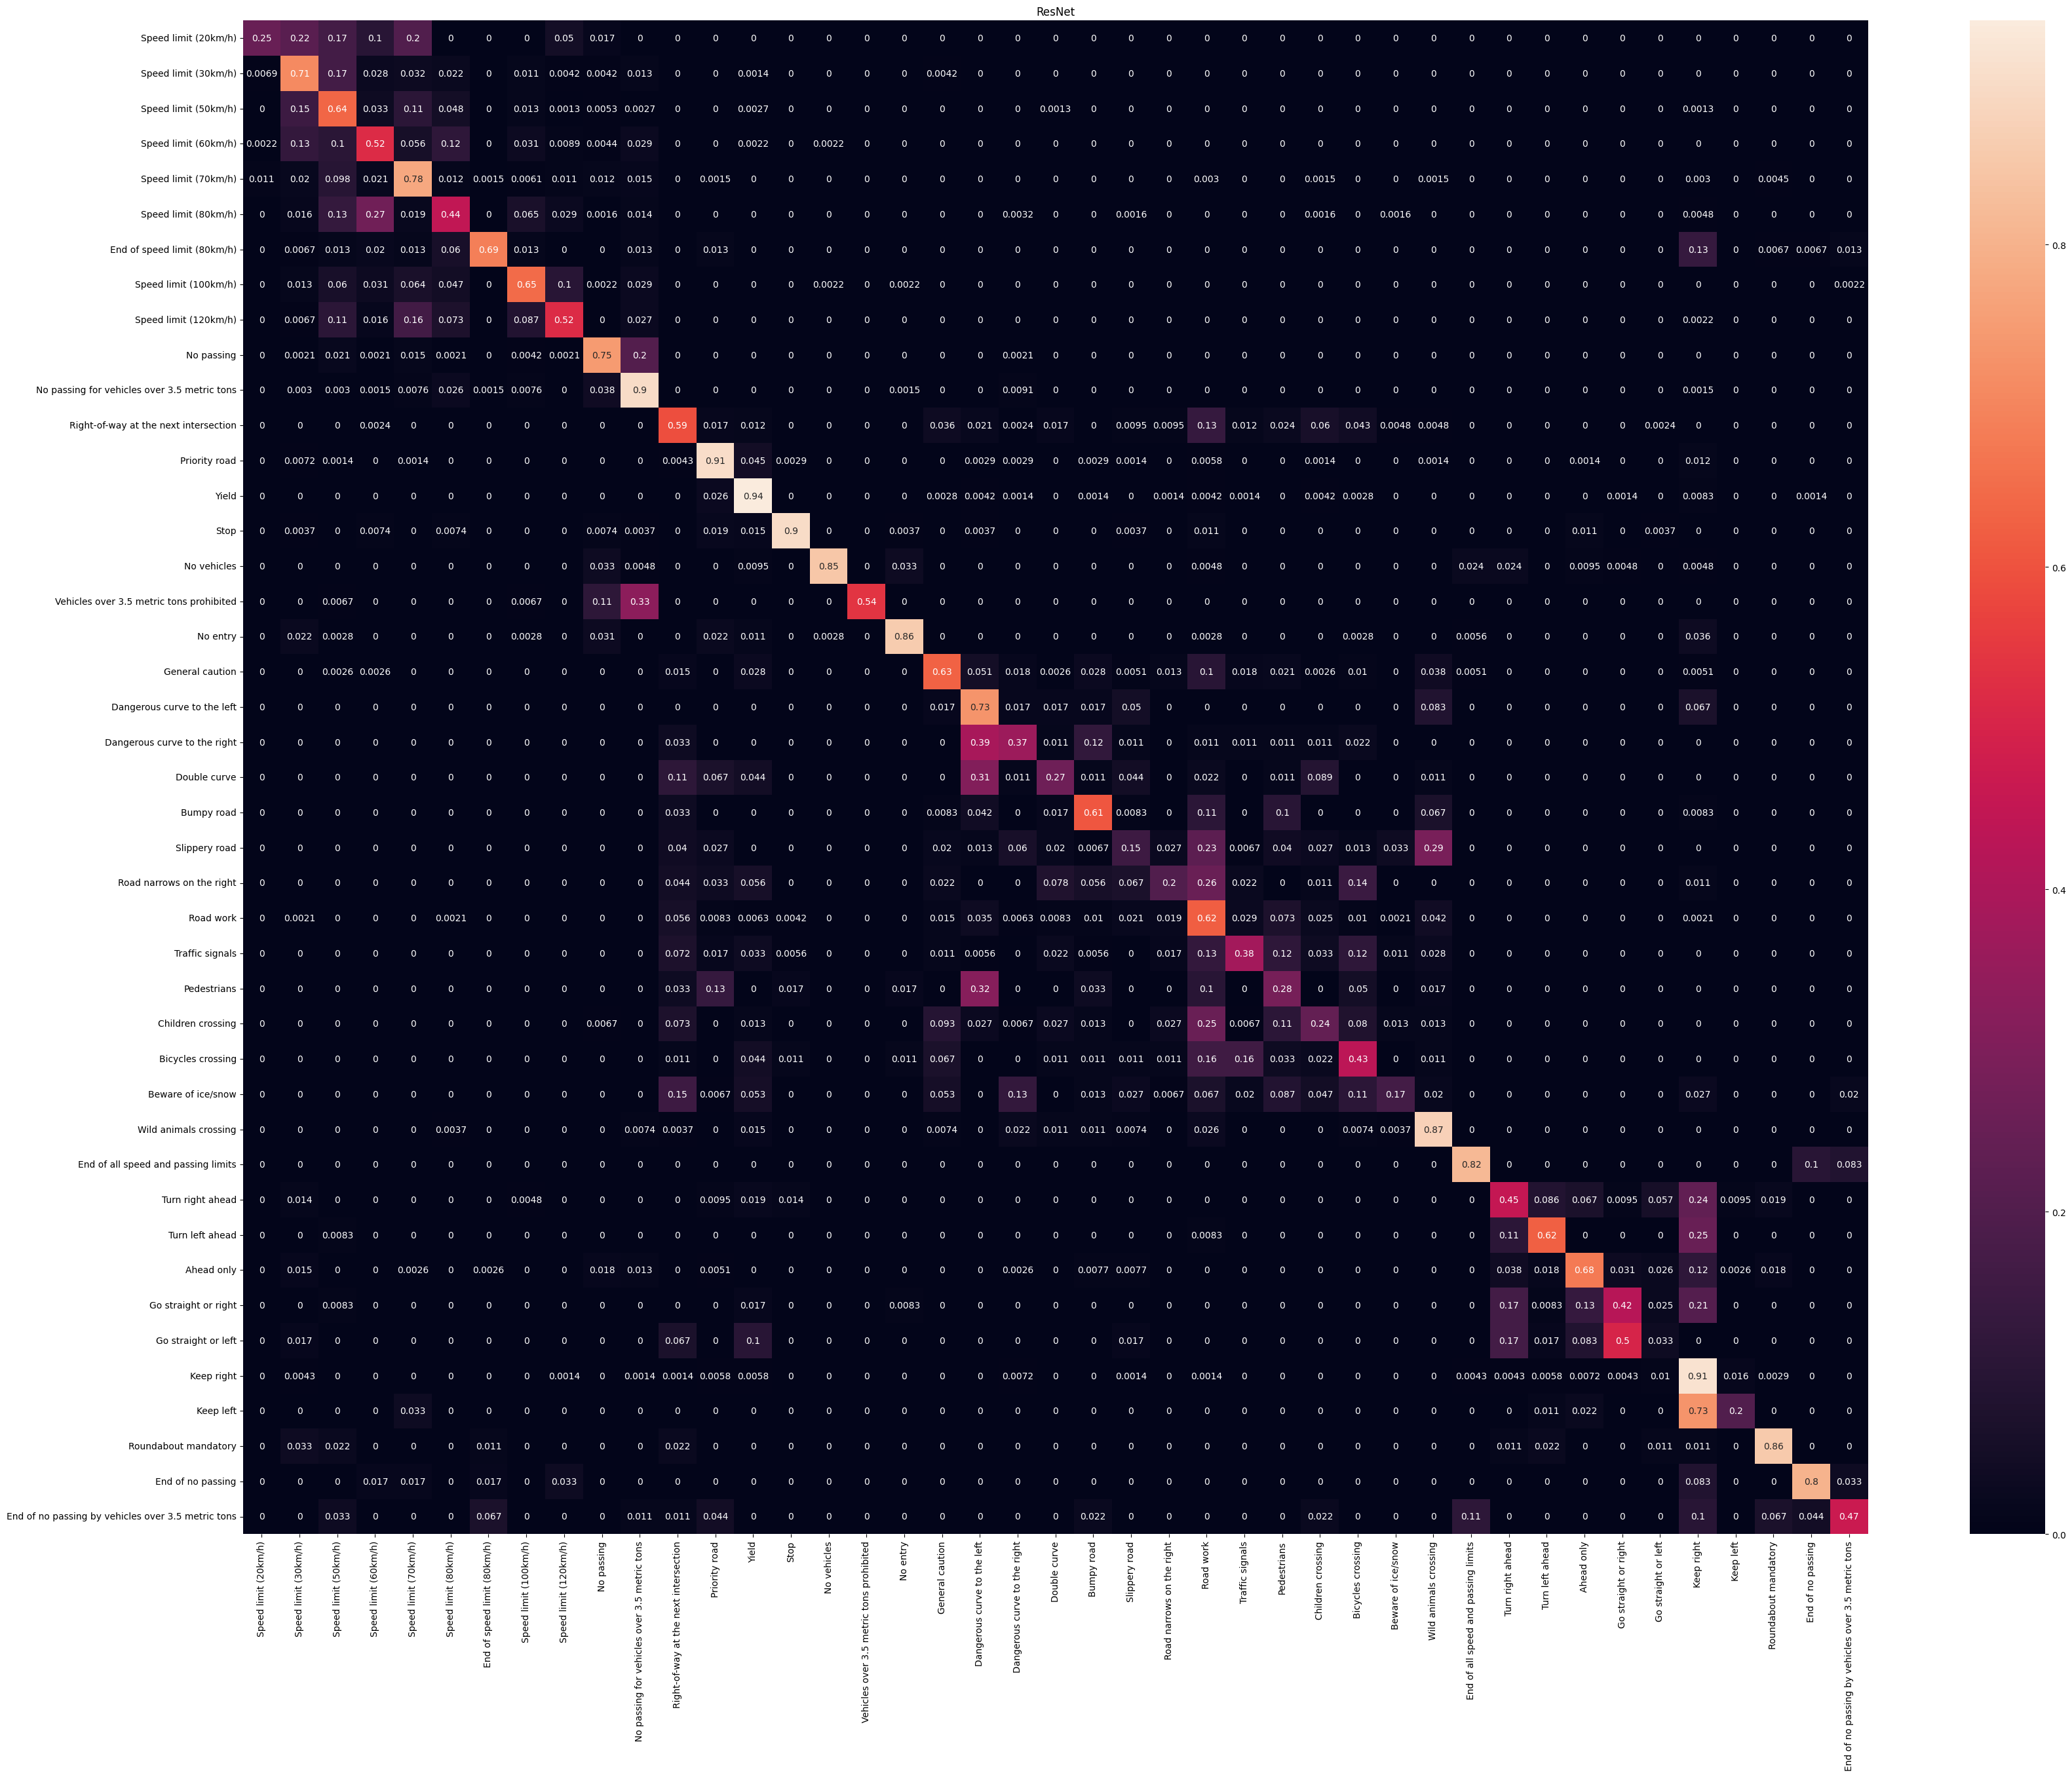

Accuracy = 0.6730868814729575, 
f1 score = 0.5780754377470999, 
precision = 0.621070156023373, 
recall = 0.5729612309852451


In [ ]:
acc, f1, precision, recall = calculate_performance(model_vgg, 
                                                  test_dataloader, 
                                                  device, 
                                                  labels, 
                                                  "ResNet")
print(f"Accuracy = {acc}, \nf1 score = {f1}, \nprecision = {precision}, \nrecall = {recall}")


To identify misclassifed signs, confusion matrix will help! The diagonal elements with darker color represent the ones which have been misclassified. Recall that the diagonal elements represent the number of correctly classified samples for each class, while the off-diagonal elements represent the number of samples that were misclassified as belonging to a different class.

**Grayscale? Let's check!**

In [ ]:
gray_training = dict()
gray_validation = dict()
gray_test = dict()

gray_training['features'] = gray_train_ndarr
gray_training['labels'] = training['labels']

gray_validation['features'] = gray_valid_ndarr
gray_validation['labels'] = validation['labels']

gray_test['features'] = gray_test_ndarr
gray_test['labels'] = test['labels']

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor()
])

gray_train_dataset = TrafficSignsDataset(gray_training, transform=transform)
gray_valid_dataset = TrafficSignsDataset(gray_validation, transform=transform)
gray_test_dataset = TrafficSignsDataset(gray_test, transform=transform)

train_dataloader = DataLoader(gray_train_dataset, batch_size=32, shuffle=True, num_workers=NUM_WORKERS, pin_memory=True)
valid_dataloader = DataLoader(gray_valid_dataset, batch_size=32, shuffle=True, num_workers=NUM_WORKERS, pin_memory=True)
test_dataloader = DataLoader(gray_test_dataset, batch_size=32, shuffle=False, num_workers=NUM_WORKERS, pin_memory=True)

In [ ]:
#CustomCNN

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_custom_gray = CustomCNN(input_shape=1, output_shape=43)
model_custom_gray.to(device)

CustomCNN(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout(p=0.25, inplace=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False

In [ ]:
optimizer = torch.optim.SGD(model_custom_gray.parameters(), lr=0.01, momentum = 0.9)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
results_custom_gray = train(model_custom_gray,
                       train_dataloader,
                       valid_dataloader,
                       optimizer,
                       loss_fn,
                       epochs=10,
                       device=device)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 4.6681 | train_acc: 0.1208 | test_loss: 2.0600 | test_acc: 0.3450
Epoch: 2 | train_loss: 2.4708 | train_acc: 0.4198 | test_loss: 1.5777 | test_acc: 0.6960
Epoch: 3 | train_loss: 0.7116 | train_acc: 0.7772 | test_loss: 0.7084 | test_acc: 0.8631
Epoch: 4 | train_loss: 0.4208 | train_acc: 0.8717 | test_loss: 0.3417 | test_acc: 0.9146
Epoch: 5 | train_loss: 0.2080 | train_acc: 0.9361 | test_loss: 1.6922 | test_acc: 0.9410
Epoch: 6 | train_loss: 0.1510 | train_acc: 0.9549 | test_loss: 0.2111 | test_acc: 0.9530
Epoch: 7 | train_loss: 0.1129 | train_acc: 0.9668 | test_loss: 0.1711 | test_acc: 0.9524
Epoch: 8 | train_loss: 0.0885 | train_acc: 0.9718 | test_loss: 3.8925 | test_acc: 0.9663
Epoch: 9 | train_loss: 0.0682 | train_acc: 0.9793 | test_loss: 1.2833 | test_acc: 0.9598
Epoch: 10 | train_loss: 0.0599 | train_acc: 0.9821 | test_loss: 0.4033 | test_acc: 0.9598


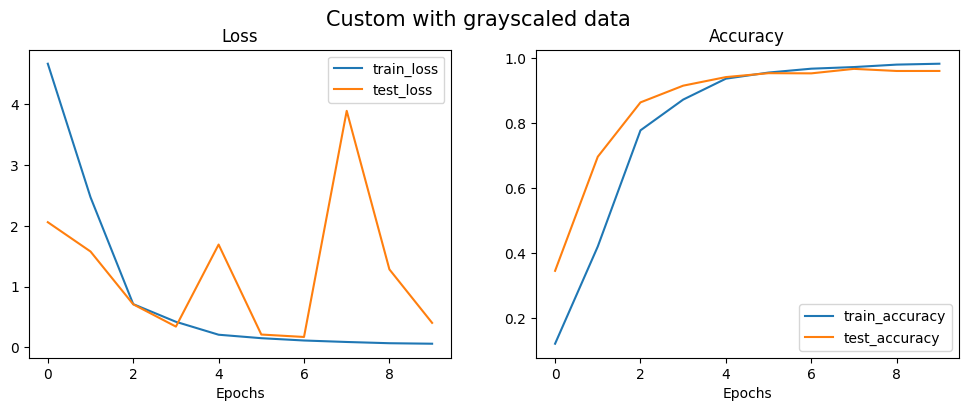

In [ ]:
plot_loss_curves(results_custom_gray, title="Custom with grayscaled data")

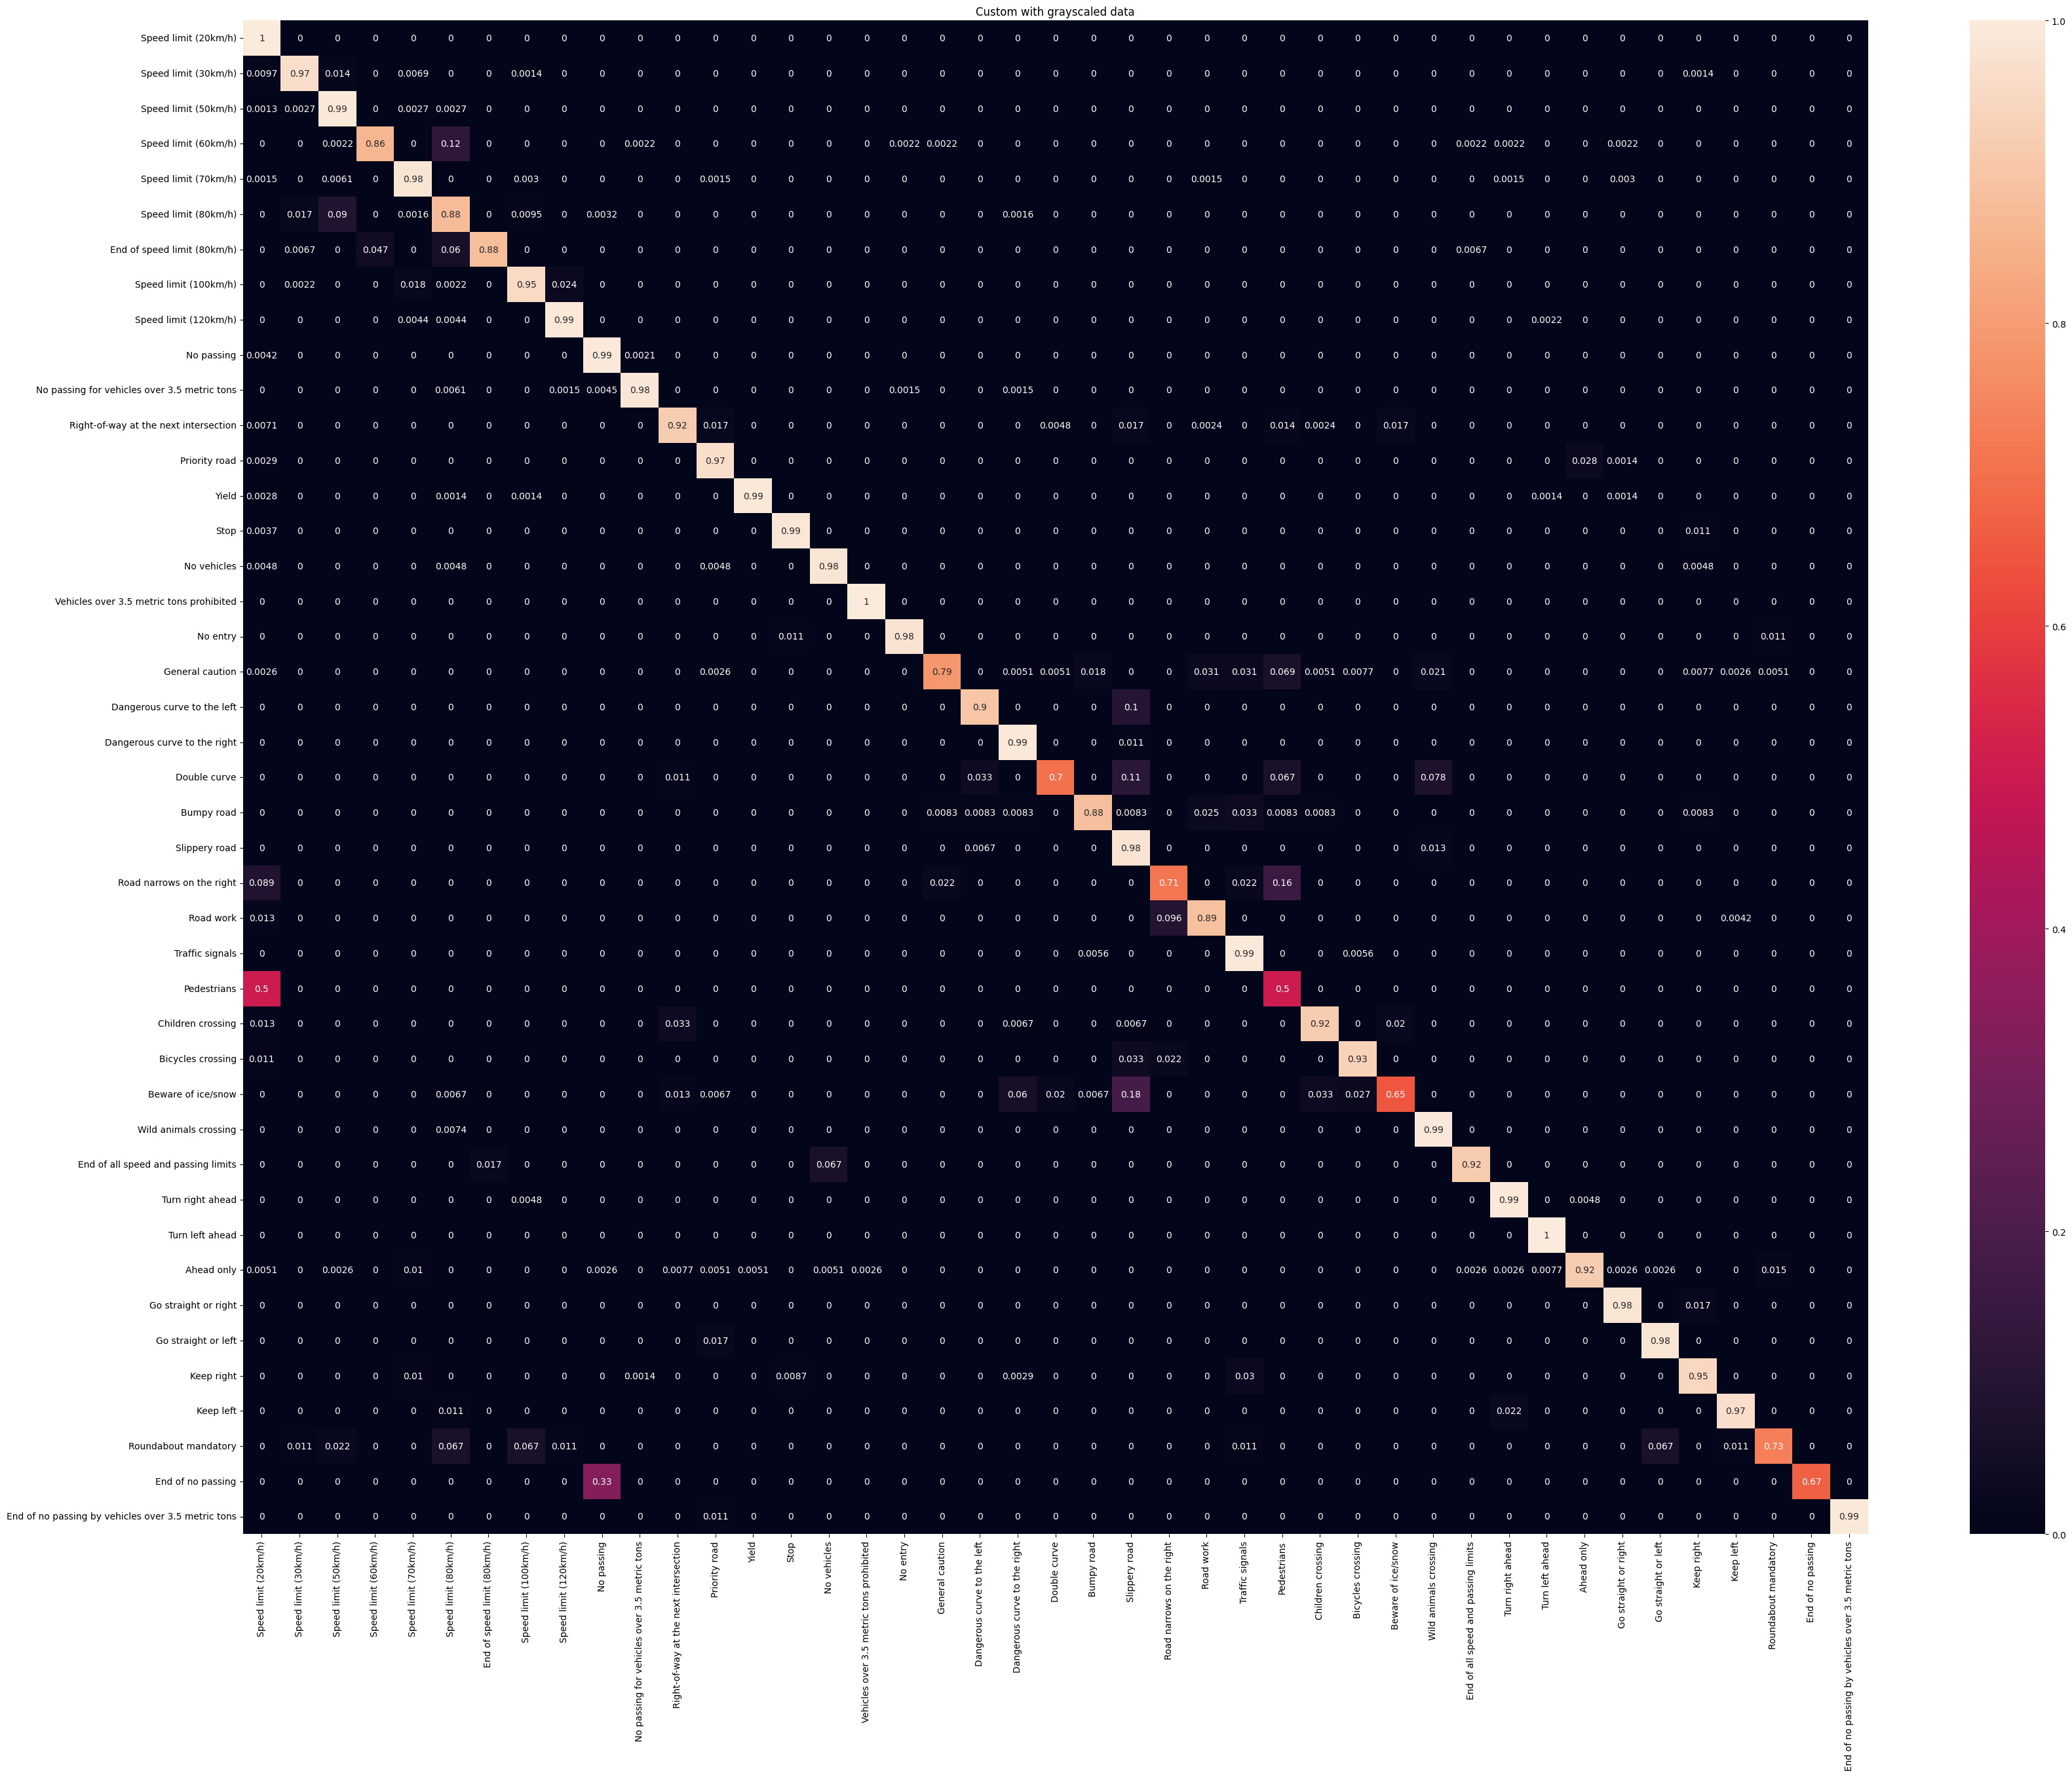

Accuracy = 0.9395281933256617, 
f1 score = 0.9042087092402152, 
precision = 0.9081474621875386, 
recall = 0.9120204536223241


In [ ]:
acc, f1, precision, recall = calculate_performance(model_custom_gray, 
                                                  test_dataloader, 
                                                  device, 
                                                  labels, 
                                                  "Custom with grayscaled data")
print(f"Accuracy = {acc}, \nf1 score = {f1}, \nprecision = {precision}, \nrecall = {recall}")


**Imbalanced?**

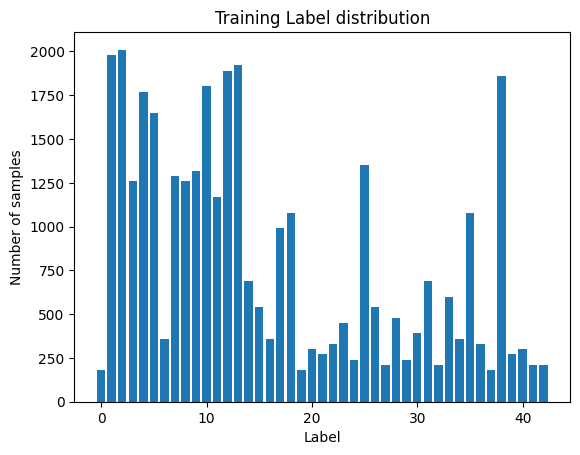

In [ ]:
unique_labels, counts = np.unique(list(training['labels']), return_counts=True)

plt.bar(unique_labels, counts)
plt.xlabel('Label')
plt.ylabel('Number of samples')
plt.title('Training Label distribution')
plt.show()

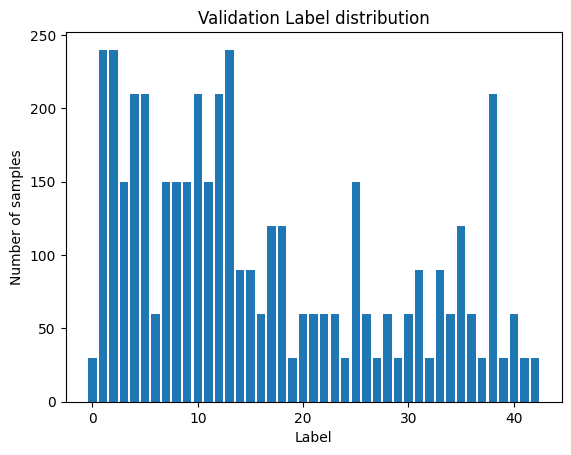

In [ ]:
unique_labels, counts = np.unique(list(validation['labels']), return_counts=True)

plt.bar(unique_labels, counts)
plt.xlabel('Label')
plt.ylabel('Number of samples')
plt.title('Validation Label distribution')
plt.show()

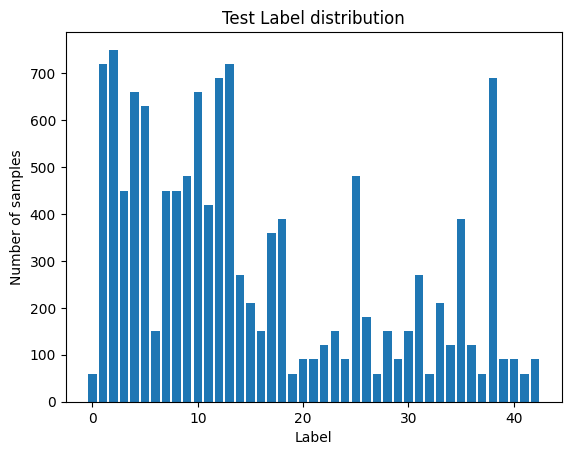

In [ ]:
unique_labels, counts = np.unique(list(test['labels']), return_counts=True)

plt.bar(unique_labels, counts)
plt.xlabel('Label')
plt.ylabel('Number of samples')
plt.title('Test Label distribution')
plt.show()

The dataset is clearly imbalanced!